In [11]:
from sklearn.cluster import KMeans
k = 5
kmeans = KMeans(n_clusters=k)
y_predd = kmeans.fit_predict(k)

ValueError: Expected 2D array, got scalar array instead:
array=5.0.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

### 데이터 설정

In [1]:
%matplotlib inline
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# 중심점이 5개인 100개의 점 데이터를 무작위로 생성합니다.
points, labels = make_blobs(n_samples=100, centers=5, n_features=2, random_state=135)

print(points.shape, points[:10])  # 무작위로 생성된 점의 좌표 10개 출력
print(labels.shape, labels[:10])    # 10개의 점들이 각각 대응하는 중심점(label) 값 출력

(100, 2) [[ 4.63411914 -6.52590383]
 [-6.52008604  7.16624288]
 [ 2.14142339 -5.21092623]
 [ 1.70054231  8.54077897]
 [-0.33809159  8.76509668]
 [-7.69329744  7.94546313]
 [ 3.89090121 -3.06531839]
 [ 3.22338498 -2.93209009]
 [-6.63962964  5.34777334]
 [ 6.37904965 -6.46617328]]
(100,) [2 1 0 3 3 1 0 0 1 2]


### 그래프 그리기

,X,Y
0,4.634119,-6.525904
1,-6.520086,7.166243
2,2.141423,-5.210926
3,1.700542,8.540779
4,-0.338092,8.765097


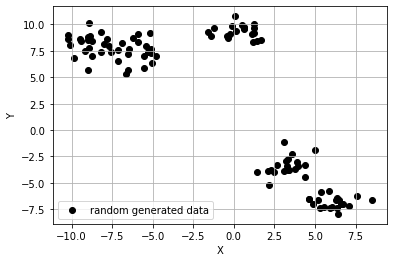

In [2]:
# 축 그리기
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# 위에서 생성한 점 데이터들을 pandas DataFrame 형태로 변환하기
points_df = pd.DataFrame(points, columns=['X', 'Y'])
display(points_df.head())

# 점 데이터를 X-Y grid에 시각화하기
ax.scatter(points[:, 0], points[:, 1], c='black', label='random generated data')

# 축 이름을 라벨에 달고, 점 데이터 그리기
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
ax.grid()

K- mean 알고리즘 순서 코드화

In [3]:
from sklearn.cluster import KMeans

# 1), 2) 위에서 생성한 무작위 점 데이터(points)에 클러스터의 수(K)가 5인 K-means 알고리즘을 적용 
kmeans_cluster = KMeans(n_clusters=5)

# 3) ~ 6) 과정이 전부 함축되어 있는 코드입니다. points에 대하여 K가 5일 때의 K-means iteration을 수행
kmeans_cluster.fit(points)

print(type(kmeans_cluster.labels_))
print(np.shape(kmeans_cluster.labels_))
print(np.unique(kmeans_cluster.labels_))

<class 'numpy.ndarray'>
(100,)
[0 1 2 3 4]


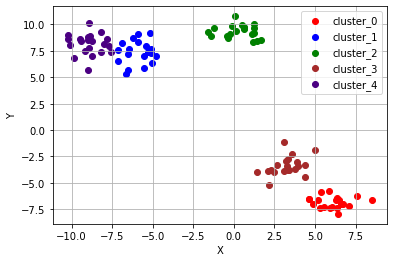

In [4]:
# n 번째 클러스터 데이터를 어떤 색으로 도식할 지 결정하는 color dictionary
color_dict = {0: 'red', 1: 'blue', 2:'green', 3:'brown', 4:'indigo'} 

# 점 데이터를 X-Y grid에 시각화합니다.
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# K-means clustering의 결과대로 색깔별로 구분하여 점에 색칠한 후 도식
for cluster in range(5):
    cluster_sub_points = points[kmeans_cluster.labels_ == cluster] # 전체 무작위 점 데이터에서 K-means 알고리즘에 의해 군집화된 sub data를 분리합니다. 
    ax.scatter(cluster_sub_points[:, 0], cluster_sub_points[:, 1], c=color_dict[cluster], label='cluster_{}'.format(cluster)) # 해당 sub data를 plot합니다.

# 축 이름을 라벨에 달고, 점 데이터 그리기
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
ax.grid()

### K-means가 사용되지 않는 모양 분포

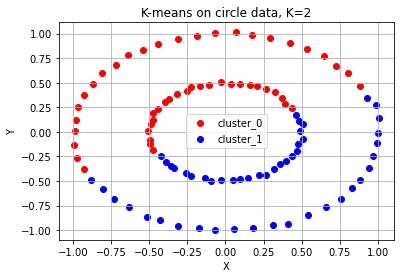

In [5]:
# K-means algorithm이 잘 동작하지 않는 예시 (1) 원형 분포
from sklearn.datasets import make_circles

# 원형 분포 데이터 생성
circle_points, circle_labels = make_circles(n_samples=100, factor=0.5, noise=0.01) # 원형 분포를 가지는 점 데이터 100개를 생성합니다.

# 캔버스 생성
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# 원형 분포에 대해 K-means 수행
circle_kmeans = KMeans(n_clusters=2)
circle_kmeans.fit(circle_points)
color_dict = {0: 'red', 1: 'blue'}
for cluster in range(2):
    cluster_sub_points = circle_points[circle_kmeans.labels_ == cluster]
    ax.scatter(cluster_sub_points[:, 0], cluster_sub_points[:, 1], c=color_dict[cluster], label='cluster_{}'.format(cluster))
ax.set_title('K-means on circle data, K=2')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend() 
ax.grid()

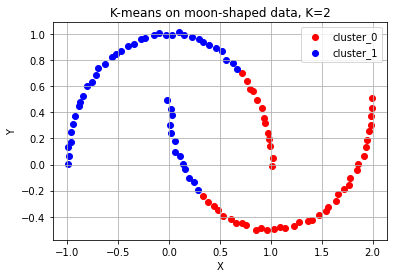

In [6]:
# K-means algorithm이 잘 동작하지 않는 예시 (2) 달 모양 분포
from sklearn.datasets import make_moons

# 달 모양 분포의 데이터 생성
moon_points, moon_labels = make_moons(n_samples=100, noise=0.01) # 달 모양 분포를 가지는 점 데이터 100개를 생성합니다.

# 캔버스 생성
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# 달 모양 분포 데이터 plot
moon_kmeans = KMeans(n_clusters=2)
moon_kmeans.fit(moon_points)
color_dict = {0: 'red', 1: 'blue'}
for cluster in range(2):
    cluster_sub_points = moon_points[moon_kmeans.labels_ == cluster]
    ax.scatter(cluster_sub_points[:, 0], cluster_sub_points[:, 1], c=color_dict[cluster], label='cluster_{}'.format(cluster))
ax.set_title('K-means on moon-shaped data, K=2')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend() 
ax.grid()

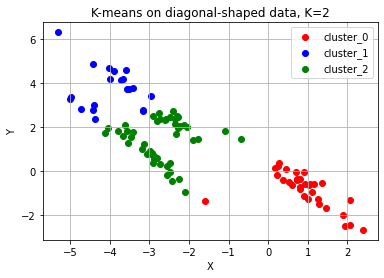

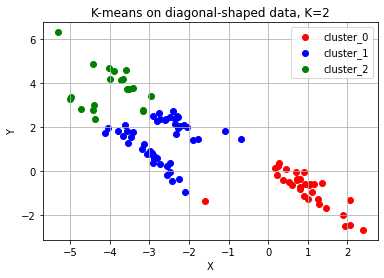

In [7]:
# K-means algorithm이 잘 동작하지 않는 예시 (3) 대각선 모양 분포
from sklearn.datasets import make_circles, make_moons, make_blobs

# 대각선 모양 분포의 데이터 생성
diag_points, _ = make_blobs(n_samples=100, random_state=170) #대각선 분포를 가지는 점 데이터 100개를 생성합니다.(현재는 무작위 분포)
transformation = [[0.6, -0.6], [-0.4, 0.8]] #대각선 변환을 위한 대각 행렬
diag_points = np.dot(diag_points, transformation) #본 과정을 통해 무작위 분포의 점 데이터를 대각선 분포로 변환합니다.

# 캔버스 생성
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# 대각선 모양 분포 데이터 plot
diag_kmeans = KMeans(n_clusters=3)
diag_kmeans.fit(diag_points)
color_dict = {0: 'red', 1: 'blue', 2: 'green'}
for cluster in range(3):
    cluster_sub_points = diag_points[diag_kmeans.labels_ == cluster]
    ax.scatter(cluster_sub_points[:, 0], cluster_sub_points[:, 1], c=color_dict[cluster], label='cluster_{}'.format(cluster))
ax.set_title('K-means on diagonal-shaped data, K=2')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend() 
ax.grid()# K-means algorithm이 잘 동작하지 않는 예시 (3) 대각선 모양 분포
from sklearn.datasets import make_circles, make_moons, make_blobs

# 대각선 모양 분포의 데이터 생성
diag_points, _ = make_blobs(n_samples=100, random_state=170) #대각선 분포를 가지는 점 데이터 100개를 생성합니다.(현재는 무작위 분포)
transformation = [[0.6, -0.6], [-0.4, 0.8]] #대각선 변환을 위한 대각 행렬
diag_points = np.dot(diag_points, transformation) #본 과정을 통해 무작위 분포의 점 데이터를 대각선 분포로 변환합니다.

# 캔버스 생성
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# 대각선 모양 분포 데이터 plot
diag_kmeans = KMeans(n_clusters=3)
diag_kmeans.fit(diag_points)
color_dict = {0: 'red', 1: 'blue', 2: 'green'}
for cluster in range(3):
    cluster_sub_points = diag_points[diag_kmeans.labels_ == cluster]
    ax.scatter(cluster_sub_points[:, 0], cluster_sub_points[:, 1], c=color_dict[cluster], label='cluster_{}'.format(cluster))
ax.set_title('K-means on diagonal-shaped data, K=2')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend() 
ax.grid()